9章　ディープラーニング  
2.ニューラルネットワークによる分類

Fashion-MNISTデータセット

In [ ]:
from keras.datasets import fashion_mnist

# Fashion-MNISTデータセットをダウンロードしてNumpy配列に格納
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# データの形状を調べる
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# x_tarinに格納されている一つ目の画像データを入力
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

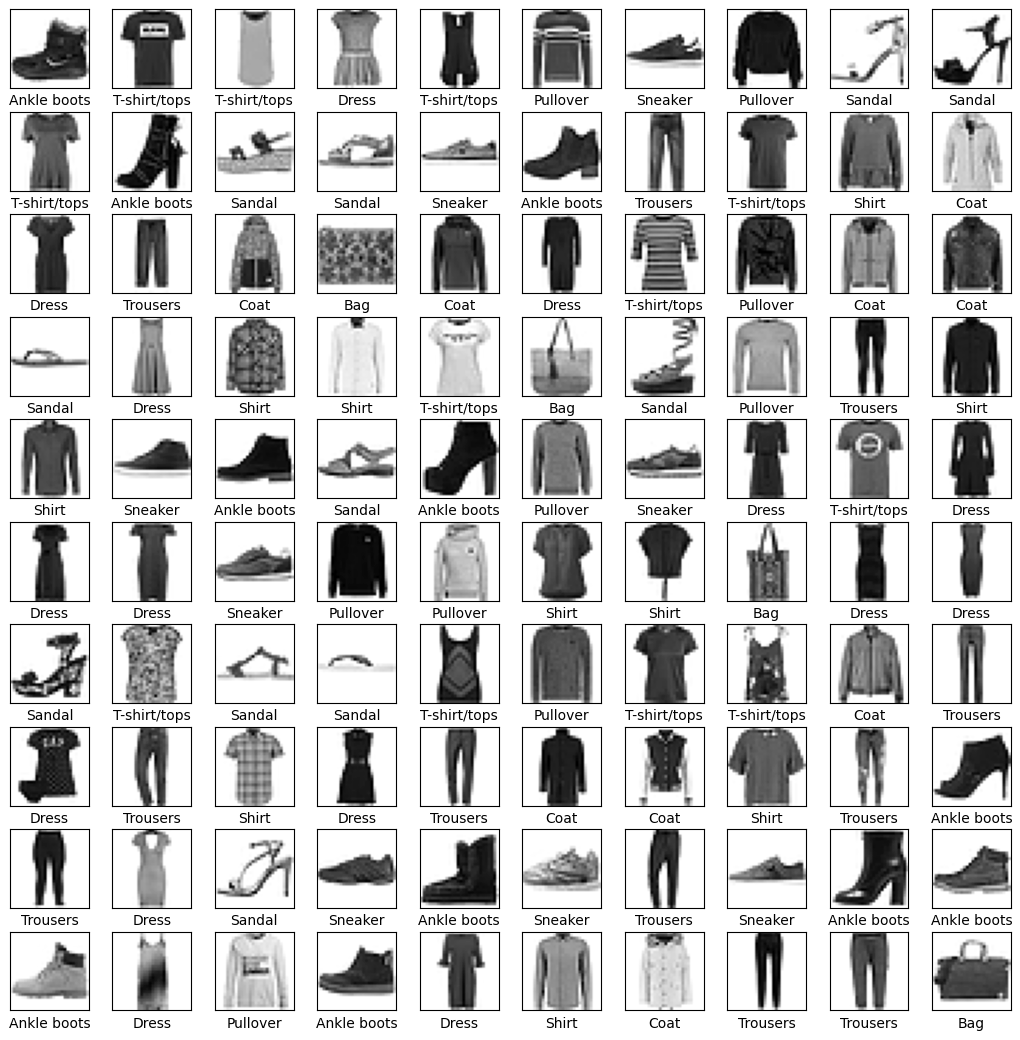

In [ ]:
import matplotlib.pyplot as plt

# 正解ラベルに割り当てられたアイテム名を登録
class_names = [
    'T-shirt/tops', 'Trousers', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots'
]

plt.figure(figsize=(13, 13))

# 訓練データから１００枚抽出してプロットする
for i in range(100):
  # 10x10で出力
  plt.subplot(10, 10, i + 1)
  # 縦方向の感覚を空ける
  plt.subplots_adjust(hspace=0.3)
  # 縦目盛を非表示にする
  plt.xticks([])
  plt.yticks([])

  # カラーマップにグレースケールを設定してプロット
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  # x軸ラベルにアイテム名を出力
  plt.xlabel(class_names[y_train[i]])

plt.show()


In [ ]:
'''
1. データセットの読み込みと前処理
'''
# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (28, 28)の画像データを(, 784)の形状にに変換し，(データ数, 784)の２層テンソルにする
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# 画像のピクセル値を255で割って0.0〜1.0のスケールに変換する
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
'''
2. モデルの作成
'''
# keras.modelからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDense, Dropoutをインポート
from tensorflow.keras.layers import Dense, Dropout
# keras.optimizersをインポート
from tensorflow.keras.optimizers import SGD

# モデルの原型を作成
model = Sequential()

# 第１層の作成
model.add(
    Dense(
        512, # 隠れ層のニューロン数
        input_dim=784, # 入力するデータサイズは512
        activation='relu' # 活性化関数はReLUm関数
    )
)

In [ ]:
# 第１層の直後に50％のドロップアウトを追加する
model.add(Dropout(0.5))

In [ ]:
# 第２層の作成
model.add(
    Dense(
        10,  # 出力層のニューロン数は10
        activation='softmax' # 活性化はソフトマックス関数
    )
)

In [ ]:
# 損失関数とバックプロパゲーションのアルゴリズムを実装してモデルをコンパイル
model.compile(
    # スパース行列対応クロスエントロピー誤差
    loss='sparse_categorical_crossentropy',
    # バックプロパゲーションに確率的勾配降下法を指定
    # 学習率をデフォルトの0.01から0.1に変更
    optimizer=SGD(learning_rate=0.1),
    # 学習評価として正解率を指定
    metrics=['accuracy']
)

In [ ]:
# モデルの概要を出力
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
3. 学習を行う
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数を設定
training_epochs = 20 # 学習回数
# ミニバッチサイズ
batch_size = 64

# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss', # 監視対象は損失
    patience=5 # 監視する回数
)

# 学習を行って進捗状況を出力
history = model.fit(
    x_train, # 訓練データ
    y_train, # 正解ラベル
    epochs=training_epochs, # 学習回数
    batch_size=batch_size,  # ミニバッチのサイズ
    verbose=1,               # 学習の進捗状況を出力する
    validation_split=0.2,       # 検証データとして使用する割合
    shuffle=True,             # 検証データを抽出する際にシャッフルする
    callbacks=[early_stopping]
)


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6498 - accuracy: 0.7739 - val_loss: 0.4702 - val_accuracy: 0.8328
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4739 - accuracy: 0.8292 - val_loss: 0.4214 - val_accuracy: 0.8509
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4320 - accuracy: 0.8436 - val_loss: 0.3990 - val_accuracy: 0.8550
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4059 - accuracy: 0.8542 - val_loss: 0.3936 - val_accuracy: 0.8522
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3851 - accuracy: 0.8597 - val_loss: 0.3679 - val_accuracy: 0.8689
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3747 - accuracy: 0.8642 - val_loss: 0.3528 - val_accuracy: 0.8712
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3607 - accuracy: 0.8691 - val_loss: 0.3429 - val_accuracy: 0.8791
Epoch 

In [ ]:
'''
4. テストデータで評価する
'''
# テストデータで分類予測を行って精度・損失を取得する
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの損失を出力
print('Test loss:', score[0])
# テストデータの正解率（精度）を出力
print('Test accuravy:', score[1])

Test loss: 0.3262200355529785
Test accuravy: 0.8842999935150146


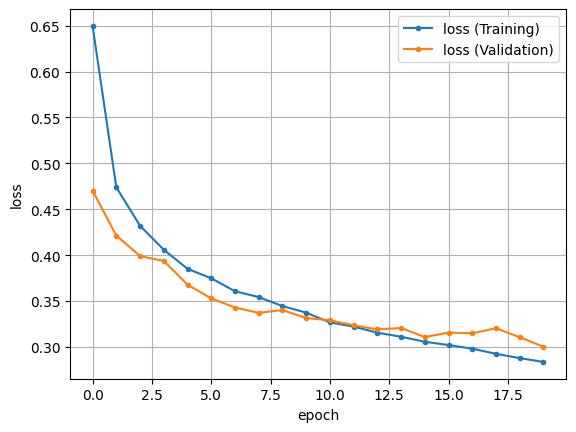

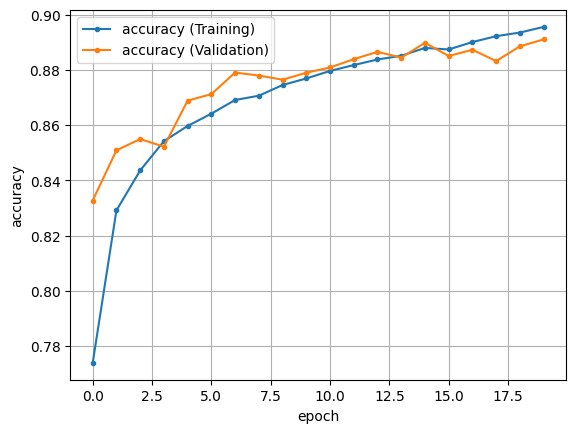

In [ ]:
'''
5. 損失，正解率をグラフにする
'''
import matplotlib.pyplot as plt

# 訓練データの損失をプロット
plt.plot(
    history.history['loss'],
    marker='.',
    label='loss (Training)'
)

# 検証データの損失をプロット
plt.plot(
    history.history['val_loss'],
    marker='.',
    label='loss (Validation)'
)

plt.legend()    # 判例を表示
plt.grid()       # グリッド表示
plt.xlabel('epoch') # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練でデータの精度をプロット
plt.plot(
    history.history['accuracy'],
    marker='.',
    label='accuracy (Training)'
)

# 検証データの精度をプロット
plt.plot(
    history.history['val_accuracy'],
    marker='.',
    label='accuracy (Validation)'
)

plt.legend(loc='best') # 判例を表示
plt.grid()              # グリッドを表示
plt.xlabel('epoch')     # x軸ラベル
plt.ylabel('accuracy')  # y軸ラベル
plt.show()